In [1]:
from os import listdir
from os.path import isfile, join
import json
import random
import sys
import statistics

In [6]:
sys.executable

'/home/aspr/.cache/pypoetry/virtualenvs/metrics-codegen-JHjEOtAq-py3.9/bin/python'

In [ ]:
!pip install pygments

In [24]:
from nltk.util import ngrams

In [8]:
import os
sys.path.append(os.path.join(os.path.abspath(os.getcwd()), "metrics-evaluation"))

In [13]:
import bootstrap
import importlib

In [4]:
all_snippets = json.load(open('./to-grade/conala/all-singles.json'))
lst = [i for i in range(len(all_snippets))]

In [12]:
from importlib import import_module
import_module('.tokenizers', 'sacrebleu_code.sacrebleu_methods')

<module 'sacrebleu_code.sacrebleu_methods.tokenizers' from '/home/aspr/IdeaProjects/metrics-codegen/metrics-evaluation/sacrebleu_code/sacrebleu_methods/tokenizers/__init__.py'>

In [17]:
grade_files = [f for f in listdir('./to-grade/conala/') if isfile(join('./to-grade/conala/', f))]
grade_files.remove('all-singles.json')
all_grades = json.load(open('./to-grade/conala/all-singles.json'))[:-1]
for file_name in grade_files:
    assessor_name = file_name.split('.')[1]
    grades = json.load(open('./to-grade/conala/'+file_name))
    if "consent" in grades[-1]:
        grades = grades[:-1]
    for i, item in enumerate(grades):
        for model_grade in ['grade-tranx-annot', 'grade-snippet', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-baseline', 'grade-codex']:
            current_grade = item.get(model_grade)
            if (current_grade is not None):
                if all_grades[i].get(model_grade) is None:
                    all_grades[i][model_grade] = dict()
                if current_grade > -1:
                    try:
                        all_grades[i][model_grade][assessor_name] = current_grade
                    except:
                        print(all_grades[i][model_grade])
                        raise Exception

In [18]:
print(all_grades)

[{'intent': 'send a signal `signal.SIGUSR1` to the current process', 'snippet': 'os.kill(os.getpid(), signal.SIGUSR1)', 'baseline': "os.system('<unk>.png',s = 300)", 'tranx-annot': 'sys.signal(`signal.SIGUSR1`)', 'best-tranx': 'os.system(`signal.SIGUSR1`)', 'best-tranx-rerank': 'os.system(`< unk > < unk > < unk >`)', 'codex': 'os.kill(os.getpid(), signal.SIGUSR1)', 'grade-baseline': {'spirin': 0, 'misha': 1, 'egor': 0}, 'grade-tranx-annot': {'seryozha': 4, 'areyde': 4, 'dima': 4, 'misha': 1, 'egor': 0}, 'grade-snippet': {'areyde': 1, 'misha': 4, 'egor': 4, 'yarik': 4}, 'grade-best-tranx': {'areyde': 1, 'misha': 1, 'egor': 1, 'vovak': 2, 'yarik': 1}, 'grade-best-tranx-rerank': {'areyde': 1, 'misha': 0, 'egor': 0}, 'grade-codex': {'seryozha': 2, 'dima': 3, 'misha': 3, 'egor': 4}}, {'intent': "decode a hex string '4a4b4c' to UTF-8.", 'snippet': "bytes.fromhex('4a4b4c').decode('utf-8')", 'baseline': '"""\\\\ascii.decode(\'utf-8\').decode(\'utf-8\')', 'tranx-annot': 'print(4a4b4c.decode(`ut

In [9]:
with open("conala-human-grades.json", 'w') as o:
    json.dump(all_grades, o)

In [13]:
grade_files = [f for f in listdir('./to-grade/hs/') if isfile(join('./to-grade/hs/', f))]
grade_files.remove('hs.json')
all_grades = json.load(open('./to-grade/hs/hs.json'))
for file_name in grade_files:
    assessor_name = file_name.split('.')[0]
    grades = json.load(open('./to-grade/hs/'+file_name))
    if "consent" in grades[-1]:
        grades = grades[:-1]
    for i, item in enumerate(grades):
        for model_grade in ["grade-gcnn", "grade-nl2code"]:
            current_grade = item.get(model_grade)
            if (current_grade is not None):
                if all_grades[i].get(model_grade) is None:
                    all_grades[i][model_grade] = dict()
                if current_grade > -1:
                    try:
                        all_grades[i][model_grade][assessor_name] = current_grade
                    except:
                        print(all_grades[i][model_grade])
                        raise Exception

In [14]:
print(all_grades)

[{'snippet': 'class Archmage(MinionCard ) : \n    def __init__ (self) :\n        super().__init__("Archmage", 6, CHARACTER_CLASS.ALL, CARD_RARITY.COMMON)\n\n    def create_minion (self, player) :\n        return Minion(4, 7, spell_damage = 1)', 'gcnn': 'class Archmage(MinionCard ) : \n    def __init__ (self) :\n        super().__init__("Archmage", 6, CHARACTER_CLASS.ALL, CARD_RARITY.COMMON)\n\n    def create_minion (self, player) :\n        return Minion(4, 7, spell_damage = 1)', 'nl2code': "class Archmage(MinionCard):\n\n    def __init__(self):\n        super().__init__('Archmage', 6, CHARACTER_CLASS.ALL, CARD_RARITY.COMMON\n            )\n\n    def create_minion(self, player):\n        return Minion(4, 7, spell_damage=1)\n", 'grade-gcnn': {'alyona': 4, 'egor': 4, 'areyde': 4, 'misha': 3}, 'grade-nl2code': {'alyona': 4, 'egor': 4, 'areyde': 3, 'misha': 4}}, {'snippet': 'class BootyBayBodyguard(MinionCard ) : \n    def __init__ (self) :\n        super().__init__("Booty Bay Bodyguard", 

In [15]:
with open("hs-human-grades.json", 'w') as o:
    json.dump(all_grades, o)

In [25]:
def myround(a, b): #for averaging grades, gotta fix later
    if random.randint(1,2) == 1:
        return int(round((a+b-0.001)/2,0))
    else:
        return int(round((a+b+0.001)/2,0))

In [20]:
all_grade_names = ['grade-tranx-annot', 'grade-snippet', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-baseline', 'grade-codex']
to_remove = []
for i, d1 in enumerate(all_grades):
    if isinstance(d1['snippet'], str):
        d1['snippet'] = [d1['snippet']]
    for j, d2 in enumerate(all_grades):
        if ((i<j) and (d1['intent'] == d2['intent'])):
            to_remove.append(j)
            d1['snippet'].append(d2['snippet'])
            for model_grade in all_grade_names:
                for key in d2[model_grade]:
                    if d1[model_grade].get(key) == None:
                        d1[model_grade][key] = d2[model_grade][key]
                    else:
                        d1[model_grade][key] = myround(d1[model_grade][key], d2[model_grade][key])

In [21]:
clean_grades = [all_grades[j] for j in range(len(all_grades)) if j not in to_remove]

In [22]:
clean_grades

[{'intent': 'send a signal `signal.SIGUSR1` to the current process',
  'snippet': ['os.kill(os.getpid(), signal.SIGUSR1)'],
  'baseline': "os.system('<unk>.png',s = 300)",
  'tranx-annot': 'sys.signal(`signal.SIGUSR1`)',
  'best-tranx': 'os.system(`signal.SIGUSR1`)',
  'best-tranx-rerank': 'os.system(`< unk > < unk > < unk >`)',
  'codex': 'os.kill(os.getpid(), signal.SIGUSR1)',
  'grade-baseline': {'spirin': 0, 'misha': 1, 'egor': 0},
  'grade-tranx-annot': {'seryozha': 4,
   'areyde': 4,
   'dima': 4,
   'misha': 1,
   'egor': 0},
  'grade-snippet': {'areyde': 1, 'misha': 4, 'egor': 4, 'yarik': 4},
  'grade-best-tranx': {'areyde': 1,
   'misha': 1,
   'egor': 1,
   'vovak': 2,
   'yarik': 1},
  'grade-best-tranx-rerank': {'areyde': 1, 'misha': 0, 'egor': 0},
  'grade-codex': {'seryozha': 2, 'dima': 3, 'misha': 3, 'egor': 4}},
 {'intent': "decode a hex string '4a4b4c' to UTF-8.",
  'snippet': ["bytes.fromhex('4a4b4c').decode('utf-8')"],
  'baseline': '"""\\\\ascii.decode(\'utf-8\').de

In [23]:
with open("conala-human-grades.json", 'w') as o:
    json.dump(clean_grades, o)

In [10]:
from collections import defaultdict
cnt = defaultdict(int)
for item in clean_grades:
    for grade in ['grade-tranx-annot', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-baseline', 'grade-codex']:
        cnt[len(item[grade])] += 1
print(cnt)

defaultdict(<class 'int'>, {5: 502, 3: 402, 4: 998, 6: 364, 8: 27, 7: 57, 9: 5, 10: 5})


In [30]:
total_labels = 0
for (key, value) in cnt.items():
    total_labels += key * value
print(total_labels /5 /472)

4.492372881355933


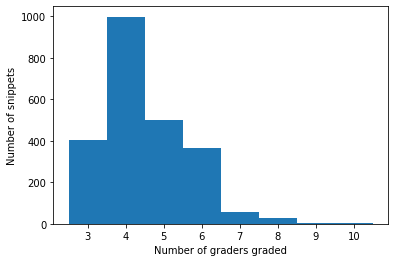

In [36]:
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*sorted(cnt.items()))

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes , labels)
plt.xlabel('Number of graders graded')
plt.ylabel('Number of snippets')
plt.savefig("graders-distrib.pdf")
plt.show()

# Metrics evaluation

In [11]:
from ruby.util import tokenize_tranx as tknz
sys.path.append(os.path.join(os.path.abspath(os.getcwd()), "metrics-evaluation/codebleu"))
from codebleu.codebleu import codebleu as cbl
from ruby.similarity import ruby as ruby
from sacrebleu_code.sacrebleu_methods.compat import sentence_chrf
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import single_meteor_score as meteor
from sacrebleu_code.sacrebleu_methods.compat import sentence_bleu

In [12]:
clean_grades

[{'intent': 'send a signal `signal.SIGUSR1` to the current process',
  'snippet': ['os.kill(os.getpid(), signal.SIGUSR1)'],
  'baseline': "os.system('<unk>.png',s = 300)",
  'tranx-annot': 'sys.signal(`signal.SIGUSR1`)',
  'best-tranx': 'os.system(`signal.SIGUSR1`)',
  'best-tranx-rerank': 'os.system(`< unk > < unk > < unk >`)',
  'codex': 'os.kill(os.getpid(), signal.SIGUSR1)',
  'grade-baseline': {'spirin': 0, 'misha': 1, 'egor': 0},
  'grade-tranx-annot': {'seryozha': 4,
   'areyde': 4,
   'dima': 4,
   'misha': 1,
   'egor': 0},
  'grade-snippet': {'areyde': 1, 'misha': 4, 'egor': 4, 'yarik': 4},
  'grade-best-tranx': {'areyde': 1,
   'misha': 1,
   'egor': 1,
   'vovak': 2,
   'yarik': 1},
  'grade-best-tranx-rerank': {'areyde': 1, 'misha': 0, 'egor': 0},
  'grade-codex': {'seryozha': 2, 'dima': 3, 'misha': 3, 'egor': 4}},
 {'intent': "decode a hex string '4a4b4c' to UTF-8.",
  'snippet': ["bytes.fromhex('4a4b4c').decode('utf-8')"],
  'baseline': '"""\\\\ascii.decode(\'utf-8\').de

In [13]:
# ROUGE-L
def rougel_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            max_score = 0
            hyp = tknz(item[field])
            for snp in item['snippet']:
                ref = tknz(snp)
                cur_score = round(rouge_scorer._score_lcs(ref, hyp).fmeasure, 3)
                max_score = max(cur_score, max_score)
            item['rougel-'+field] = max_score

In [14]:
# codebleu
def codebleu_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            max_score = 0
            hyp = item[field]
            for snp in item['snippet']:
                cur_score = round(cbl(snp, hyp), 3)
                max_score = max(cur_score, max_score)
            item['codebleu-'+field] = max_score

In [15]:
# ruby
def ruby_all(model_dictionary, model_list):
    i = 0
    for item in model_dictionary:
        print(i)
        i += 1
        for field in model_list:
            max_score = 0
            hyp = item[field]
            for snp in item['snippet']:
                cur_score = round(ruby(hyp, snp)[0], 3)
                max_score = max(cur_score, max_score)
            item['ruby-'+field] = max_score

In [16]:
# chrF
def chrf_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            item['chrf-'+field] = round(sentence_chrf(item[field], item['snippet']).score/100, 3)

In [17]:
# METEOR
def meteor_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            max_score = 0
            hyp = tknz(item[field])
            for snp in item['snippet']:
                ref = tknz(snp)
                cur_score = round(meteor(ref, hyp), 3)
                max_score = max(cur_score, max_score)
            item['meteor-'+field] = max_score

In [18]:
# BLEU
def bleu_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            item['bleu-'+field] = round(sentence_bleu(item[field], item['snippet']).score/100, 3)

In [18]:
clean_grades

[{'intent': 'send a signal `signal.SIGUSR1` to the current process',
  'snippet': ['os.kill(os.getpid(), signal.SIGUSR1)'],
  'baseline': "os.system('<unk>.png',s = 300)",
  'tranx-annot': 'sys.signal(`signal.SIGUSR1`)',
  'best-tranx': 'os.system(`signal.SIGUSR1`)',
  'best-tranx-rerank': 'os.system(`< unk > < unk > < unk >`)',
  'codex': 'os.kill(os.getpid(), signal.SIGUSR1)',
  'grade-baseline': {'spirin': 0, 'misha': 1, 'egor': 0},
  'grade-tranx-annot': {'seryozha': 4,
   'areyde': 4,
   'dima': 4,
   'misha': 1,
   'egor': 0},
  'grade-snippet': {'areyde': 1, 'misha': 4, 'egor': 4, 'yarik': 4},
  'grade-best-tranx': {'areyde': 1,
   'misha': 1,
   'egor': 1,
   'vovak': 2,
   'yarik': 1},
  'grade-best-tranx-rerank': {'areyde': 1, 'misha': 0, 'egor': 0},
  'grade-codex': {'seryozha': 2, 'dima': 3, 'misha': 3, 'egor': 4}},
 {'intent': "decode a hex string '4a4b4c' to UTF-8.",
  'snippet': ["bytes.fromhex('4a4b4c').decode('utf-8')"],
  'baseline': '"""\\\\ascii.decode(\'utf-8\').de

In [19]:
all_models_list = ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']
rougel_all(clean_grades,all_models_list)
bleu_all(clean_grades,all_models_list)
chrf_all(clean_grades,all_models_list)
meteor_all(clean_grades,all_models_list)
ruby_all(clean_grades,all_models_list)
codebleu_all(clean_grades,all_models_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86


87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
3

In [50]:
with open("conala-all-grades1.json", 'w') as o:
    json.dump(clean_grades, o)

In [15]:
import pandas as pd

In [21]:
clean_grades

[{'intent': 'send a signal `signal.SIGUSR1` to the current process',
  'snippet': ['os.kill(os.getpid(), signal.SIGUSR1)'],
  'baseline': "os.system('<unk>.png',s = 300)",
  'tranx-annot': 'sys.signal(`signal.SIGUSR1`)',
  'best-tranx': 'os.system(`signal.SIGUSR1`)',
  'best-tranx-rerank': 'os.system(`< unk > < unk > < unk >`)',
  'codex': 'os.kill(os.getpid(), signal.SIGUSR1)',
  'grade-baseline': {'spirin': 0, 'misha': 1, 'egor': 0},
  'grade-tranx-annot': {'seryozha': 4,
   'areyde': 4,
   'dima': 4,
   'misha': 1,
   'egor': 0},
  'grade-snippet': {'areyde': 1, 'misha': 4, 'egor': 4, 'yarik': 4},
  'grade-best-tranx': {'areyde': 1,
   'misha': 1,
   'egor': 1,
   'vovak': 2,
   'yarik': 1},
  'grade-best-tranx-rerank': {'areyde': 1, 'misha': 0, 'egor': 0},
  'grade-codex': {'seryozha': 2, 'dima': 3, 'misha': 3, 'egor': 4},
  'rougel-baseline': 0.4,
  'rougel-tranx-annot': 0.5,
  'rougel-best-tranx': 0.583,
  'rougel-best-tranx-rerank': 0.267,
  'rougel-codex': 1.0,
  'bleu-baseline

In [16]:
with open('conala-all-grades-cb.json') as f:
    clean_grades = json.load(f)

In [17]:
row_list = []
for i, item in enumerate(clean_grades):
    for j, field in enumerate(['grade-baseline', 'grade-tranx-annot', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-codex']):
        task_number = i + j * len(clean_grades)
        for (key, value) in item[field].items():
            a = {
                "performer": key,
                "task": task_number,
                "label": value
            }
            row_list.append(a)
df = pd.DataFrame(row_list, columns=["performer", "task", "label"])

In [18]:
from crowdkit.aggregation import MMSR, DawidSkene, GLAD

In [19]:
agg_mmsr = MMSR().fit_predict(df)
golden_truth = agg_mmsr.tolist()

final_grades = clean_grades
fields = ['grade-baseline', 'grade-tranx-annot', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-codex']
for i, grade in enumerate(golden_truth):
    quest = i % len(final_grades)
    field = i // len(final_grades)
    final_grades[quest][fields[field]] = grade

In [ ]:
    allrefs = []
for problem in model_dictionary:
    allrefs.append(problem["snippet"])
content = [item for sublist in allrefs for item in sublist]
k = 500
lexer = PythonLexer()
tokens = []
for j in content:
    tokens.extend([i for i in list(map(lambda x: x[1], lexer.get_tokens(j))) if not (re.fullmatch('\s+', i) or re.fullmatch('#.*\n', i) or re.match('\"\"\".*\"\"\"', i, re.DOTALL))])
pl_counts = []
for i in range(1, 5):
    pl_counts.append(Counter(ngrams(tokens, i)))#%%
from os import listdir
from os.path import isfile, join
import json
import random
import sys
import statistics

In [ ]:
sys.executable

In [ ]:
!pip install pygments

In [ ]:
from nltk.util import ngrams

In [ ]:
import os
sys.path.append(os.path.join(os.path.abspath(os.getcwd()), "metrics-evaluation"))

In [ ]:
import bootstrap
import importlib

In [ ]:
all_snippets = json.load(open('./to-grade/conala/all-singles.json'))
lst = [i for i in range(len(all_snippets))]

In [ ]:
from importlib import import_module
import_module('.tokenizers', 'sacrebleu_code.sacrebleu_methods')

In [ ]:
grade_files = [f for f in listdir('./to-grade/conala/') if isfile(join('./to-grade/conala/', f))]
grade_files.remove('all-singles.json')
all_grades = json.load(open('./to-grade/conala/all-singles.json'))[:-1]
for file_name in grade_files:
    assessor_name = file_name.split('.')[1]
    grades = json.load(open('./to-grade/conala/'+file_name))
    if "consent" in grades[-1]:
        grades = grades[:-1]
    for i, item in enumerate(grades):
        for model_grade in ['grade-tranx-annot', 'grade-snippet', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-baseline', 'grade-codex']:
            current_grade = item.get(model_grade)
            if (current_grade is not None):
                if all_grades[i].get(model_grade) is None:
                    all_grades[i][model_grade] = dict()
                if current_grade > -1:
                    try:
                        all_grades[i][model_grade][assessor_name] = current_grade
                    except:
                        print(all_grades[i][model_grade])
                        raise Exception

In [ ]:
print(all_grades)

In [ ]:
with open("conala-human-grades.json", 'w') as o:
    json.dump(all_grades, o)

In [ ]:
grade_files = [f for f in listdir('./to-grade/hs/') if isfile(join('./to-grade/hs/', f))]
grade_files.remove('hs.json')
all_grades = json.load(open('./to-grade/hs/hs.json'))
for file_name in grade_files:
    assessor_name = file_name.split('.')[0]
    grades = json.load(open('./to-grade/hs/'+file_name))
    if "consent" in grades[-1]:
        grades = grades[:-1]
    for i, item in enumerate(grades):
        for model_grade in ["grade-gcnn", "grade-nl2code"]:
            current_grade = item.get(model_grade)
            if (current_grade is not None):
                if all_grades[i].get(model_grade) is None:
                    all_grades[i][model_grade] = dict()
                if current_grade > -1:
                    try:
                        all_grades[i][model_grade][assessor_name] = current_grade
                    except:
                        print(all_grades[i][model_grade])
                        raise Exception

In [ ]:
print(all_grades)

In [ ]:
with open("hs-human-grades.json", 'w') as o:
    json.dump(all_grades, o)

In [ ]:
def myround(a, b): #for averaging grades, gotta fix later
    if random.randint(1,2) == 1:
        return int(round((a+b-0.001)/2,0))
    else:
        return int(round((a+b+0.001)/2,0))

In [ ]:
all_grade_names = ['grade-tranx-annot', 'grade-snippet', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-baseline', 'grade-codex']
to_remove = []
for i, d1 in enumerate(all_grades):
    if isinstance(d1['snippet'], str):
        d1['snippet'] = [d1['snippet']]
    for j, d2 in enumerate(all_grades):
        if ((i<j) and (d1['intent'] == d2['intent'])):
            to_remove.append(j)
            d1['snippet'].append(d2['snippet'])
            for model_grade in all_grade_names:
                for key in d2[model_grade]:
                    if d1[model_grade].get(key) == None:
                        d1[model_grade][key] = d2[model_grade][key]
                    else:
                        d1[model_grade][key] = myround(d1[model_grade][key], d2[model_grade][key])

In [ ]:
clean_grades = [all_grades[j] for j in range(len(all_grades)) if j not in to_remove]

In [ ]:
clean_grades

In [ ]:
with open("conala-human-grades.json", 'w') as o:
    json.dump(clean_grades, o)

In [ ]:
from collections import defaultdict
cnt = defaultdict(int)
for item in clean_grades:
    for grade in ['grade-tranx-annot', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-baseline', 'grade-codex']:
        cnt[len(item[grade])] += 1
print(cnt)

In [ ]:
total_labels = 0
for (key, value) in cnt.items():
    total_labels += key * value
print(total_labels /5 /472)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*sorted(cnt.items()))

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes , labels)
plt.xlabel('Number of graders graded')
plt.ylabel('Number of snippets')
plt.savefig("graders-distrib.pdf")
plt.show()

# Metrics evaluation

In [ ]:
from ruby.util import tokenize_tranx as tknz
sys.path.append(os.path.join(os.path.abspath(os.getcwd()), "metrics-evaluation/codebleu"))
from codebleu.codebleu import codebleu as cbl
from ruby.similarity import ruby as ruby
from sacrebleu_code.sacrebleu_methods.compat import sentence_chrf
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import single_meteor_score as meteor
from sacrebleu_code.sacrebleu_methods.compat import sentence_bleu

In [ ]:
clean_grades

In [ ]:
# ROUGE-L
def rougel_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            max_score = 0
            hyp = tknz(item[field])
            for snp in item['snippet']:
                ref = tknz(snp)
                cur_score = round(rouge_scorer._score_lcs(ref, hyp).fmeasure, 3)
                max_score = max(cur_score, max_score)
            item['rougel-'+field] = max_score

In [ ]:
# codebleu
def codebleu_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            max_score = 0
            hyp = item[field]
            for snp in item['snippet']:
                cur_score = round(cbl(snp, hyp), 3)
                max_score = max(cur_score, max_score)
            item['codebleu-'+field] = max_score

In [ ]:
# ruby
def ruby_all(model_dictionary, model_list):
    i = 0
    for item in model_dictionary:
        print(i)
        i += 1
        for field in model_list:
            max_score = 0
            hyp = item[field]
            for snp in item['snippet']:
                cur_score = round(ruby(hyp, snp)[0], 3)
                max_score = max(cur_score, max_score)
            item['ruby-'+field] = max_score

In [ ]:
# chrF
def chrf_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            item['chrf-'+field] = round(sentence_chrf(item[field], item['snippet']).score/100, 3)

In [ ]:
# METEOR
def meteor_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            max_score = 0
            hyp = tknz(item[field])
            for snp in item['snippet']:
                ref = tknz(snp)
                cur_score = round(meteor(ref, hyp), 3)
                max_score = max(cur_score, max_score)
            item['meteor-'+field] = max_score

In [ ]:
# BLEU
def bleu_all(model_dictionary, model_list):
    for item in model_dictionary:
        for field in model_list:
            item['bleu-'+field] = round(sentence_bleu(item[field], item['snippet']).score/100, 3)

In [ ]:
clean_grades

In [ ]:
all_models_list = ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']
rougel_all(clean_grades,all_models_list)
bleu_all(clean_grades,all_models_list)
chrf_all(clean_grades,all_models_list)
meteor_all(clean_grades,all_models_list)
ruby_all(clean_grades,all_models_list)
codebleu_all(clean_grades,all_models_list)

In [ ]:
with open("conala-all-grades1.json", 'w') as o:
    json.dump(clean_grades, o)

In [ ]:
import pandas as pd

In [ ]:
clean_grades

In [ ]:
with open('conala-all-grades-cb.json') as f:
    clean_grades = json.load(f)

In [ ]:
row_list = []
for i, item in enumerate(clean_grades):
    for j, field in enumerate(['grade-baseline', 'grade-tranx-annot', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-codex']):
        task_number = i + j * len(clean_grades)
        for (key, value) in item[field].items():
            a = {
                "performer": key,
                "task": task_number,
                "label": value
            }
            row_list.append(a)
df = pd.DataFrame(row_list, columns=["performer", "task", "label"])

In [ ]:
from crowdkit.aggregation import MMSR, DawidSkene, GLAD

In [ ]:
agg_mmsr = MMSR().fit_predict(df)
golden_truth = agg_mmsr.tolist()

final_grades = clean_grades
fields = ['grade-baseline', 'grade-tranx-annot', 'grade-best-tranx', 'grade-best-tranx-rerank', 'grade-codex']
for i, grade in enumerate(golden_truth):
    quest = i % len(final_grades)
    field = i // len(final_grades)
    final_grades[quest][fields[field]] = grade

In [75]:
from pygments.lexers.python import PythonLexer
from collections import Counter
import re
from nltk.util import ngrams
allrefs = []
for problem in final_grades:
    allrefs.append(problem["snippet"])
content = [item for sublist in allrefs for item in sublist]
k = 2
lexer = PythonLexer()
tokens = []
for j in content:
    tokens.extend([i for i in list(map(lambda x: x[1], lexer.get_tokens(j))) if not (re.fullmatch('\s+', i) or re.fullmatch('#.*\n', i) or re.match('\"\"\".*\"\"\"', i, re.DOTALL))])
pl_counts = []
for i in range(1, 5):
    pl_counts.append(dict(Counter(ngrams(tokens, i)).most_common(k)))
fl_counts = {k: v for d in pl_counts for k, v in d.items()}
print(fl_counts)

{("'",): 1000, ('(',): 888, ('(', "'"): 251, ("'", ','): 194, ("'", ',', "'"): 100, ("'", ')', '.'): 38, (')', ',', '(', "'"): 19, ('.', 'split', '(', "'"): 17}


In [157]:
allrefs = []
for problem in final_grades:
    allrefs.append(problem["snippet"])
content = [item for sublist in allrefs for item in sublist]
k = 125
lexer = PythonLexer()
tokens = []
for j in content:
    tokens.extend([i for i in list(map(lambda x: x[1], lexer.get_tokens(j))) if not (re.fullmatch('\s+', i) or re.fullmatch('#.*\n', i) or re.match('\"\"\".*\"\"\"', i, re.DOTALL))])
pl_counts = []
for i in range(1, 5):
    pl_counts.append(dict(Counter(ngrams(tokens, i)).most_common(k)))
trivially_shared_ngrams = {k: v for d in pl_counts for k, v in d.items()}
print(trivially_shared_ngrams)
from ruby.util import tokenize_tranx as tknz
hyp = []
ref = []
for i in range(472):
    hyp.append(tknz(final_grades[i]['codex']))
    eref = []
    for item in final_grades[i]['snippet']:
        eref.append(tknz(item))
    ref.append(eref)
print(crb(hyp, ref, ignoring=trivially_shared_ngrams))

AttributeError: 'dict' object has no attribute 'most_common'

In [115]:
importlib.reload(bootstrap)
from bootstrap import bootstrapped_crb
print(bootstrapped_crb(final_grades, 'codex', range(472)))

TypeError: unhashable type: 'list'

In [80]:
from crystalbleu import corpus_bleu as crb

## Synthetic models

In [94]:
percentage_changes = [1, 3, 5, 10, 15, 20, 25, 30]
improvement_flag = [True, False]
models = ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']
i = 0
for base_model in models:
    other_models = [model for model in models if model != base_model]
    metrics = ['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'ruby', 'cbs', 'cbsnp', 'bleu']
    for flag in improvement_flag:
        for percentage in percentage_changes:
            print(i)
            i += 1
            bootstrap.synthesize_model(final_grades, base_model, other_models, percentage, metrics, improve = flag)

0
1
2
3
4
5
6
7
8
9
10
11
12
Failed to generate enough changed snippets. 4 new snippets are lacking.
13
Failed to generate enough changed snippets. 27 new snippets are lacking.
14
Failed to generate enough changed snippets. 51 new snippets are lacking.
15
Failed to generate enough changed snippets. 75 new snippets are lacking.
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
Failed to generate enough changed snippets. 4 new snippets are lacking.
72
73
74
75
76
77
78
79


In [95]:
all_models_list = []
for (key, _) in final_grades[0].items():
    key_first = key.split('-')[0]
    if key_first not in metrics:
        all_models_list.append(key)
all_models_list.remove('intent')
all_models_list.remove('snippet')
print(all_models_list)

['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex', 'baseline_1_1', 'baseline_3_1', 'baseline_5_1', 'baseline_10_1', 'baseline_15_1', 'baseline_20_1', 'baseline_25_1', 'baseline_30_1', 'baseline_1_0', 'baseline_3_0', 'baseline_5_0', 'baseline_10_0', 'tranx-annot_1_1', 'tranx-annot_3_1', 'tranx-annot_5_1', 'tranx-annot_10_1', 'tranx-annot_15_1', 'tranx-annot_20_1', 'tranx-annot_25_1', 'tranx-annot_30_1', 'tranx-annot_1_0', 'tranx-annot_3_0', 'tranx-annot_5_0', 'tranx-annot_10_0', 'tranx-annot_15_0', 'tranx-annot_20_0', 'tranx-annot_25_0', 'tranx-annot_30_0', 'best-tranx_1_1', 'best-tranx_3_1', 'best-tranx_5_1', 'best-tranx_10_1', 'best-tranx_15_1', 'best-tranx_20_1', 'best-tranx_25_1', 'best-tranx_30_1', 'best-tranx_1_0', 'best-tranx_3_0', 'best-tranx_5_0', 'best-tranx_10_0', 'best-tranx_15_0', 'best-tranx_20_0', 'best-tranx_25_0', 'best-tranx_30_0', 'best-tranx-rerank_1_1', 'best-tranx-rerank_3_1', 'best-tranx-rerank_5_1', 'best-tranx-rerank_10_1', 'best-tranx-reran

In [96]:
def remove_redundant_models(model_dictionary, metrics_list, model):
    for entry in model_dictionary:
        del entry[model]
        for metric in metrics_list:
            del entry[metric+'-'+model]

In [97]:
models_to_remove = set()
for i, model1 in enumerate(all_models_list):
    for j, model2 in enumerate(all_models_list):
        if i > j:
            equivalent_models = True
            for item in final_grades:
                if not equivalent_models:
                    break
                if item[model1] != item[model2]:
                    equivalent_models = False
            if equivalent_models:
                models_to_remove.add(model2)
                print(model2)
for model in models_to_remove:
    all_models_list.remove(model)
    remove_redundant_models(final_grades, metrics, model)

baseline_25_0
baseline_25_0
baseline_15_0
baseline_25_0
baseline_15_0
baseline_20_0


In [113]:
all_models_list

['baseline',
 'tranx-annot',
 'best-tranx',
 'best-tranx-rerank',
 'codex',
 'baseline_1_1',
 'baseline_3_1',
 'baseline_5_1',
 'baseline_10_1',
 'baseline_15_1',
 'baseline_20_1',
 'baseline_25_1',
 'baseline_30_1',
 'baseline_1_0',
 'baseline_3_0',
 'baseline_5_0',
 'baseline_10_0',
 'tranx-annot_1_1',
 'tranx-annot_3_1',
 'tranx-annot_5_1',
 'tranx-annot_10_1',
 'tranx-annot_15_1',
 'tranx-annot_20_1',
 'tranx-annot_25_1',
 'tranx-annot_30_1',
 'tranx-annot_1_0',
 'tranx-annot_3_0',
 'tranx-annot_5_0',
 'tranx-annot_10_0',
 'tranx-annot_15_0',
 'tranx-annot_20_0',
 'tranx-annot_25_0',
 'tranx-annot_30_0',
 'best-tranx_1_1',
 'best-tranx_3_1',
 'best-tranx_5_1',
 'best-tranx_10_1',
 'best-tranx_15_1',
 'best-tranx_20_1',
 'best-tranx_25_1',
 'best-tranx_30_1',
 'best-tranx_1_0',
 'best-tranx_3_0',
 'best-tranx_5_0',
 'best-tranx_10_0',
 'best-tranx_15_0',
 'best-tranx_20_0',
 'best-tranx_25_0',
 'best-tranx_30_0',
 'best-tranx-rerank_1_1',
 'best-tranx-rerank_3_1',
 'best-tranx-reran

In [122]:
importlib.reload(bootstrap)
model_pairs, model_scores = bootstrap.bootstrap(final_grades, all_models_list, metrics, bootstrap_sampling = 500)

baseline grade
baseline rougel
baseline codebleu
baseline chrf
baseline meteor
baseline ruby
baseline cbs
baseline cbsnp
tranx-annot grade
tranx-annot rougel
tranx-annot codebleu
tranx-annot chrf
tranx-annot meteor
tranx-annot ruby
tranx-annot cbs
tranx-annot cbsnp
best-tranx grade
best-tranx rougel
best-tranx codebleu
best-tranx chrf
best-tranx meteor
best-tranx ruby
best-tranx cbs
best-tranx cbsnp
best-tranx-rerank grade
best-tranx-rerank rougel
best-tranx-rerank codebleu
best-tranx-rerank chrf
best-tranx-rerank meteor
best-tranx-rerank ruby
best-tranx-rerank cbs
best-tranx-rerank cbsnp
codex grade
codex rougel
codex codebleu
codex chrf
codex meteor
codex ruby
codex cbs
codex cbsnp
baseline_1_1 grade
baseline_1_1 rougel
baseline_1_1 codebleu
baseline_1_1 chrf
baseline_1_1 meteor
baseline_1_1 ruby
baseline_1_1 cbs
baseline_1_1 cbsnp
baseline_3_1 grade
baseline_3_1 rougel
baseline_3_1 codebleu
baseline_3_1 chrf
baseline_3_1 meteor
baseline_3_1 ruby
baseline_3_1 cbs
baseline_3_1 cbsnp
b

In [123]:
with open("model-pairs-cbs.json", "w") as o:
    json.dump(model_pairs, o)
with open("model-scores-cbs.json", "w") as o:
    json.dump(model_scores, o)

In [ ]:
for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        if i > j:
            print(model1, model2, model_pairs[model1][model2])

In [ ]:
def diff_into_bins(score1, score2):
    if abs(score1 - score2) < 2:
        return "0-2"
    elif 2<= abs(score1 - score2) < 5:
        return "2-5"
    elif 5 <= abs(score1 - score2) < 10:
        return "5-10"
    else:
        return "10-100"

In [121]:
model_scores['codex']

{'grade-low': 2.25,
 'grade-high': 2.531779661016949,
 'rougel-low': 0.5435868644067796,
 'rougel-high': 0.5862118644067796,
 'codebleu-low': 0.4375423728813559,
 'codebleu-high': 0.49223516949152546,
 'chrf-low': 0.40422669491525426,
 'chrf-high': 0.4516334745762712,
 'meteor-low': 0.481771186440678,
 'meteor-high': 0.5313728813559322,
 'ruby-low': 0.5553050847457627,
 'ruby-high': 0.5971398305084746,
 'cbs-low': 0.8492076271186441,
 'cbs-high': 0.8635338983050846,
 'cbsnp-low': 0.8467754237288135,
 'cbsnp-high': 0.8621694915254237}

In [124]:
def diff_into_bins(score1, score2):
    if abs(score1 - score2) < 2:
        return "0-2"
    elif 2<= abs(score1 - score2) < 5:
        return "2-5"
    elif 5 <= abs(score1 - score2) < 10:
        return "5-10"
    else:
        return "10-100"

significance_splitting = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby']:
    significance_splitting[metric] = dict()
    for bucket in ["0-2", "2-5", "5-10", "10-100"]:
        significance_splitting[metric][bucket] = [0, 0]
    for i, model1 in enumerate(all_models_list):
        for j, model2 in enumerate(all_models_list):
            if i > j:
                model1_score = model_scores[model1][metric]
                model2_score = model_scores[model2][metric]
                if metric != "bleu":
                    model1_score = model1_score*100
                    model2_score = model2_score*100
                metric_significance = model_pairs[model1][model2][metric]
                bucket = diff_into_bins(model1_score, model2_score)
                if 0.95 > metric_significance > 0.05:
                    significance_splitting[metric][bucket][1] += 1
                else:
                    significance_splitting[metric][bucket][0] += 1
print(significance_splitting)

{'rougel': {'0-2': [250, 294], '2-5': [744, 0], '5-10': [1019, 0], '10-100': [1014, 0]}, 'codebleu': {'0-2': [368, 492], '2-5': [898, 9], '5-10': [846, 0], '10-100': [708, 0]}, 'chrf': {'0-2': [236, 221], '2-5': [634, 5], '5-10': [921, 0], '10-100': [1304, 0]}, 'meteor': {'0-2': [194, 323], '2-5': [699, 8], '5-10': [916, 0], '10-100': [1181, 0]}, 'cbs': {'0-2': [1111, 241], '2-5': [1428, 0], '5-10': [541, 0], '10-100': [0, 0]}, 'cbsnp': {'0-2': [981, 248], '2-5': [1351, 0], '5-10': [725, 0], '10-100': [16, 0]}, 'ruby': {'0-2': [216, 452], '2-5': [833, 17], '5-10': [966, 0], '10-100': [837, 0]}}


In [130]:
# deciding how to split into bins
importlib.reload(bootstrap)
from collections import defaultdict
metrics = ['rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby']
splitting = bootstrap.split_into_bins(model_pairs, model_scores, metrics, all_models_list)
print(splitting)
bins_distribution = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby']:
    bins_distribution[metric] = defaultdict()
    for i in range(100):
        bins_distribution[metric][i] = defaultdict()
    bins_distribution[metric]['NS'] = defaultdict()
    for item in splitting[metric]:
        if item[0] == 'NS':
            bins_distribution[metric]['NS'][item[1]] = 1 + bins_distribution[metric]['NS'].get(item[1], 0)
        else:
            if metric == 'bleu':
                bins_distribution[metric][int(item[0])][item[1]] = 1 + bins_distribution[metric][int(item[0])].get(item[1], 0)
            else:
                bins_distribution[metric][int(item[0]*100)][item[1]] = 1 + bins_distribution[metric][int(item[0]*100)].get(item[1], 0)

{'rougel': [[0.12733474576271187, 0], [0.14989194915254234, 0], [0.02255720338983047, 0], [0.16332838983050846, 0], [0.03599364406779659, 0], [0.013436440677966122, 0], [0.19970974576271183, 0], [0.07237499999999997, 0], [0.049817796610169496, 0], [0.036381355932203374, 0], [0.0027775423728813586, 0], [0.1245572033898305, 0], [0.14711440677966098, 0], [0.1605508474576271, 0], [0.19693220338983047, 0], [0.01036652542372879, 0], [0.11696822033898308, 0], [0.13952542372881355, 0], [0.15296186440677967, 0], [0.18934322033898304, 0], [0.007588983050847431, 0], [0.014919491525423711, 0], [0.11241525423728815, 0], [0.13497245762711862, 0], [0.14840889830508475, 0], [0.18479025423728812, 0], [0.012141949152542353, 0], [0.004552966101694922, 0], [0.03466313559322032, 0], [0.09267161016949155, 0], [0.11522881355932202, 0], [0.12866525423728814, 0], [0.16504661016949151, 0], [0.03188559322033896, 0], [0.024296610169491528, 0], [0.019743644067796606, 0], [0.05008898305084747, 0], [0.07724576271186

In [ ]:
# bins splitting without NS bin

def split_into_bins(model_pairs, model_scores, metrics, models):
    splitting = dict()
    for metric in metrics:
        splitting[metric] = []
        for i, model1 in enumerate(models):
            for j, model2 in enumerate(models):
                if i > j:
                    model_comparison = []
                    metric_significance = model_pairs[model1][model2][metric]
                    grade_significance = model_pairs[model1][model2]["grade"]
                    model1_score = model_scores[model1][metric]
                    model2_score = model_scores[model2][metric]
                    model_comparison.append(abs(model1_score - model2_score))
                    model_comparison.append(bootstrap.compare_for_significance(grade_significance, metric_significance))
                    splitting[metric].append(model_comparison)
    return splitting

splitting = split_into_bins(model_pairs, model_scores, metrics, all_models_list)
bins_distribution = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    bins_distribution[metric] = defaultdict()
    for i in range(100):
        bins_distribution[metric][i] = defaultdict()
    bins_distribution[metric]['NS'] = defaultdict()
    for item in splitting[metric]:
        if item[0] == 'NS':
            bins_distribution[metric]['NS'][item[1]] = 1 + bins_distribution[metric]['NS'].get(item[1], 0)
        else:
            if metric == 'bleu':
                bins_distribution[metric][int(item[0])][item[1]] = 1 + bins_distribution[metric][int(item[0])].get(item[1], 0)
            else:
                bins_distribution[metric][int(item[0]*100)][item[1]] = 1 + bins_distribution[metric][int(item[0]*100)].get(item[1], 0)

In [131]:
bins_aggregated = dict()
all_bins = [[0, 1], [i for i in range(2, 5)], [i for i in range(5, 10)], [i for i in range(10, 100)]]
error_types = (-1, 0, 1, 2)
for metric in metrics:
    bins_aggregated[metric] = defaultdict()
    bins_aggregated[metric]['NS'] = bins_distribution[metric]['NS']
    for bucket in all_bins:
        bucket_name = bucket[0]
        bins_aggregated[metric][bucket_name] = defaultdict()
        for error in error_types:
            bins_aggregated[metric][bucket_name][error] = 0
        for item in bucket:
            for error in error_types:
                bins_aggregated[metric][bucket_name][error] += bins_distribution[metric][item].get(error, 0)


In [132]:
bins_aggregated

{'rougel': defaultdict(None,
             {'NS': defaultdict(None, {2: 212, 0: 82}),
              0: defaultdict(None, {-1: 6, 0: 236, 1: 8, 2: 0}),
              2: defaultdict(None, {-1: 38, 0: 652, 1: 54, 2: 0}),
              5: defaultdict(None, {-1: 4, 0: 980, 1: 35, 2: 0}),
              10: defaultdict(None, {-1: 0, 0: 1014, 1: 0, 2: 0})}),
 'codebleu': defaultdict(None,
             {'NS': defaultdict(None, {2: 407, 0: 94}),
              0: defaultdict(None, {-1: 9, 0: 348, 1: 11, 2: 0}),
              2: defaultdict(None, {-1: 41, 0: 820, 1: 37, 2: 0}),
              5: defaultdict(None, {-1: 11, 0: 798, 1: 37, 2: 0}),
              10: defaultdict(None, {-1: 0, 0: 708, 1: 0, 2: 0})}),
 'chrf': defaultdict(None,
             {'NS': defaultdict(None, {2: 145, 0: 81}),
              0: defaultdict(None, {-1: 5, 0: 225, 1: 6, 2: 0}),
              2: defaultdict(None, {-1: 34, 0: 533, 1: 67, 2: 0}),
              5: defaultdict(None, {-1: 0, 0: 896, 1: 25, 2: 0}),
            

In [133]:
for metric in metrics:
    num = 0
    den = 0
    for (_, value) in bins_aggregated[metric].items():
        for (key1, value1) in value.items():
            den += value1
            if key1 != 0:
                num += value1
    print(metric, den, num / den)

rougel 3321 0.10749774164408311
codebleu 3321 0.1665161096055405
chrf 3321 0.08491418247515808
meteor 3321 0.14212586570310148
cbs 3321 0.09153869316470943
cbsnp 3321 0.08099969888587774
ruby 3321 0.1897018970189702


In [ ]:
for model in ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']:
    for metric in metrics:
        print(model, metric, model_scores[model][metric], - model_scores[model][metric] + model_scores[model][metric+'-low'], - model_scores[model][metric] + model_scores[model][metric+'-high'])

In [155]:
model_scores['codex']

{'grade-low': 2.266949152542373,
 'grade-high': 2.544491525423729,
 'grade': 2.3961864406779663,
 'rougel-low': 0.5447224576271186,
 'rougel-high': 0.587093220338983,
 'rougel': 0.5649745762711864,
 'codebleu-low': 0.4414046610169492,
 'codebleu-high': 0.4915466101694915,
 'codebleu': 0.46455084745762704,
 'chrf-low': 0.4044724576271186,
 'chrf-high': 0.4535021186440678,
 'chrf': 0.42780508474576273,
 'meteor-low': 0.48272881355932207,
 'meteor-high': 0.5301610169491525,
 'meteor': 0.5063262711864407,
 'ruby-low': 0.5543093220338984,
 'ruby-high': 0.5991165254237288,
 'ruby': 0.5763474576271187,
 'cbs-low': 0.8501652542372882,
 'cbs-high': 0.8638029661016949,
 'cbs': 0.8566525423728815,
 'cbsnp-low': 0.8476588983050847,
 'cbsnp-high': 0.8628262711864407,
 'cbsnp': 0.8548771186440677}

In [ ]:
for model in ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']:
    for metric in ['grade']:
        print(model, metric, 25*model_scores[model][metric], 25*(- model_scores[model][metric] + model_scores[model][metric+'-low']), 25*(- model_scores[model][metric] + model_scores[model][metric+'-high']))

### Snippet-level correlations

In [ ]:
models = ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    kendall_tau = round(bootstrap.kendall_tau_metric(final_grades, models, metric), 3)
    print(metric, kendall_tau)

In [ ]:
grade_files = [f for f in listdir('./to-grade/conala/') if isfile(join('./to-grade/conala/', f))]
grade_files.remove('all-singles.json')
raw_grades = json.load(open('./to-grade/conala/all-singles.json'))[:-1]
models = ['tranx-annot', 'best-tranx', 'best-tranx-rerank', 'baseline', 'codex']
for file_name in grade_files:
    assessor_name = file_name.split('.')[1]
    assessor_grades = json.load(open('./to-grade/conala/'+file_name))
    for i, item in enumerate(assessor_grades):
        for model in models:
            current_grade = item.get('grade-' + model)
            if (current_grade is not None):
                if current_grade > -1:
                    try:
                        raw_grades[i][assessor_name + '-' + model] = current_grade
                    except:
                        print(raw_grades[i][assessor_name + '-' + model])
                        raise Exception

In [ ]:
assessor_names = [f.split('.')[1] for f in grade_files]

In [ ]:
to_remove = set()
for i, d1 in enumerate(raw_grades):
    if isinstance(d1['snippet'], str):
        d1['snippet'] = [d1['snippet']]
    for j, d2 in enumerate(raw_grades):
        if ((i<j) and (d1['intent'] == d2['intent'])):
            to_remove.add(j)
            d1['snippet'].append(d2['snippet'])
            for model in models:
                for name in assessor_names:
                    if d2.get(name+'-'+model) is not None:
                        if d1.get(name+'-'+model) is None:
                            d1[name+'-'+model] = d2[name+'-'+model]
                        else:
                            d1[name+'-'+model] = myround(d1[name+'-'+model], d2[name+'-'+model])

In [ ]:
pruned_grades = [raw_grades[j] for j in range(len(raw_grades)) if j not in to_remove]

In [ ]:
grades_per_person = dict()
for name in assessor_names:
    grades_per_person[name] = 0
    for d1 in pruned_grades:
        for model in models:
            if d1.get(name+'-'+model) is not None:
                grades_per_person[name] += 1
prolific_graders = set()
for (key, value) in grades_per_person.items():
    if value > 700:
        prolific_graders.add(key)
print(prolific_graders)

In [ ]:
importlib.reload(bootstrap)

In [ ]:
for i, grader1 in enumerate(prolific_graders):
    for j, grader2 in enumerate(prolific_graders):
        if i > j:
            kendall_tau = bootstrap.true_kendall_tau_people(pruned_grades, models, grader1, grader2)
            print(grader1, grader2, kendall_tau)

In [ ]:
for i, grader1 in enumerate(prolific_graders):
    for j, grader2 in enumerate(prolific_graders):
        if i > j:
            kendall_tau = bootstrap.similarized_kendall_tau_people(pruned_grades, models, grader1, grader2)
            print(grader1, grader2, kendall_tau)

In [ ]:
bootstrap.bootstrapped_bleu(final_grades, 'best-tranx-rerank', [i for i in range(len(final_grades))])

# Hearthstone

In [ ]:
grade_files = [f for f in listdir('./to-grade/hs/') if isfile(join('./to-grade/hs/', f))]
grade_files.remove('hs.json')
hs = json.load(open('./to-grade/hs/hs.json'))
for file_name in grade_files:
    assessor_name = file_name.split('.')[0]
    grades = json.load(open('./to-grade/hs/'+file_name))
    for i, item in enumerate(grades):
        for model_grade in ['grade-gcnn', 'grade-nl2code']:
            current_grade = item.get(model_grade)
            if (current_grade is not None):
                if hs[i].get(model_grade) is None:
                    hs[i][model_grade] = dict()
                if current_grade > -1:
                    try:
                        hs[i][model_grade][assessor_name] = current_grade
                    except:
                        print(hs[i])
                        raise Exception

In [ ]:
for item in hs:
    item['snippet'] = [item['snippet']]
    item['nl2code'] = item['nl2code'].rstrip()

In [ ]:
models = ['gcnn', 'nl2code']
rougel_all(hs, models)
bleu_all(hs, models)
chrf_all(hs, models)
meteor_all(hs, models)
ruby_all(hs, models)
codebleu_all(hs, models)

In [ ]:
row_list = []
for i, item in enumerate(hs):
    for j, field in enumerate(['grade-gcnn', 'grade-nl2code']):
        task_number = i + j * len(hs)
        for (key, value) in item[field].items():
            a = {
                "performer": key,
                "task": task_number,
                "label": value
            }
            row_list.append(a)
df = pd.DataFrame(row_list, columns=["performer", "task", "label"])

In [ ]:
agg_mmsr = MMSR().fit_predict(df)
golden_truth = agg_mmsr.tolist()

final_hs = hs.copy()
fields = ['grade-gcnn', 'grade-nl2code']
for i, grade in enumerate(golden_truth):
    quest = i % len(final_hs)
    field = i // len(final_hs)
    final_hs[quest][fields[field]] = grade

In [ ]:
with open("hs-all-grades1.json", 'w') as o:
    json.dump(hs, o)

## Synthetic models

In [134]:
with open('hs-all-grades-cb.json') as f:
    final_hs = json.load(f)
percentage_changes = [1, 3, 5, 10, 15, 20, 25, 30]
improvement_flag = [True, False]
models = ['gcnn', 'nl2code']
i = 0
for base_model in models:
    other_models = [model for model in models if model != base_model]
    metrics = ['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby']
    for flag in improvement_flag:
        for percentage in percentage_changes:
            print(i)
            i += 1
            bootstrap.synthesize_model(final_hs, base_model, other_models, percentage, metrics, improve = flag)

0
1
2
3
4
5
6
7
Failed to generate enough changed snippets. 1 new snippets are lacking.
8
9
10
11
12
13
14
Failed to generate enough changed snippets. 3 new snippets are lacking.
15
Failed to generate enough changed snippets. 7 new snippets are lacking.
16
17
18
19
20
21
22
Failed to generate enough changed snippets. 3 new snippets are lacking.
23
Failed to generate enough changed snippets. 7 new snippets are lacking.
24
25
26
27
28
29
30
31
Failed to generate enough changed snippets. 1 new snippets are lacking.


In [144]:
all_models_list = []
for (key, _) in final_hs[0].items():
    key_first = key.split('-')[0]
    if key_first not in metrics:
        if key_first != 'bleu':
            all_models_list.append(key)
all_models_list.remove('snippet')
print(all_models_list)

['gcnn', 'nl2code', 'gcnn_1_1', 'gcnn_3_1', 'gcnn_5_1', 'gcnn_10_1', 'gcnn_15_1', 'gcnn_20_1', 'gcnn_25_1', 'gcnn_30_1', 'gcnn_1_0', 'gcnn_3_0', 'gcnn_5_0', 'gcnn_10_0', 'gcnn_15_0', 'gcnn_30_0', 'nl2code_1_1', 'nl2code_3_1', 'nl2code_5_1', 'nl2code_10_1', 'nl2code_15_1', 'nl2code_30_1', 'nl2code_1_0', 'nl2code_3_0', 'nl2code_5_0', 'nl2code_10_0', 'nl2code_15_0', 'nl2code_20_0', 'nl2code_25_0', 'nl2code_30_0']


In [145]:
models_to_remove = set()
for i, model1 in enumerate(all_models_list):
    for j, model2 in enumerate(all_models_list):
        if i > j:
            equivalent_models = True
            for item in final_hs:
                if not equivalent_models:
                    break
                if item[model1] != item[model2]:
                    equivalent_models = False
            if equivalent_models:
                models_to_remove.add(model2)
                print(model2)
for model in models_to_remove:
    all_models_list.remove(model)
    remove_redundant_models(final_hs, metrics, model)

In [146]:
importlib.reload(bootstrap)
metrics = ['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby']
hs_pairs, hs_scores = bootstrap.bootstrap(final_hs, all_models_list, metrics, bootstrap_sampling = 500)
with open("hs-pairs-cb.json", "w") as o:
    json.dump(hs_pairs, o)
with open("hs-scores-cb.json", "w") as o:
    json.dump(hs_scores, o)

['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby'] gcnn
grade
rougel
codebleu
chrf
meteor
cbs
cbsnp
ruby
['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby'] nl2code
grade
rougel
codebleu
chrf
meteor
cbs
cbsnp
ruby
['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby'] gcnn_1_1
grade
rougel
codebleu
chrf
meteor
cbs
cbsnp
ruby
['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby'] gcnn_3_1
grade
rougel
codebleu
chrf
meteor
cbs
cbsnp
ruby
['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby'] gcnn_5_1
grade
rougel
codebleu
chrf
meteor
cbs
cbsnp
ruby
['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby'] gcnn_10_1
grade
rougel
codebleu
chrf
meteor
cbs
cbsnp
ruby
['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby'] gcnn_15_1
grade
rougel
codebleu
chrf
meteor
cbs
cbsnp
ruby
['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby'] gcnn_

In [147]:
def diff_into_bins(score1, score2):
    if abs(score1 - score2) < 1:
        return "0-1"
    elif 1<= abs(score1 - score2) < 2:
        return "1-2"
    elif 2 <= abs(score1 - score2) < 4:
        return "2-4"
    else:
        return "4-100"

significance_splitting = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby']:
    significance_splitting[metric] = dict()
    for bucket in ["0-1", "1-2", "2-4", "4-100"]:
        significance_splitting[metric][bucket] = [0, 0]
    for i, model1 in enumerate(all_models_list):
        for j, model2 in enumerate(all_models_list):
            if i > j:
                model1_score = hs_scores[model1][metric]
                model2_score = hs_scores[model2][metric]
                if metric != "bleu":
                    model1_score = model1_score*100
                    model2_score = model2_score*100
                metric_significance = hs_pairs[model1][model2][metric]
                bucket = diff_into_bins(model1_score, model2_score)
                if 0.95 > metric_significance > 0.05:
                    significance_splitting[metric][bucket][1] += 1
                else:
                    significance_splitting[metric][bucket][0] += 1
print(significance_splitting)

{'rougel': {'0-1': [65, 132], '1-2': [81, 31], '2-4': [126, 0], '4-100': [0, 0]}, 'codebleu': {'0-1': [29, 238], '1-2': [23, 107], '2-4': [25, 13], '4-100': [0, 0]}, 'chrf': {'0-1': [73, 136], '1-2': [87, 29], '2-4': [102, 0], '4-100': [8, 0]}, 'meteor': {'0-1': [27, 147], '1-2': [19, 32], '2-4': [161, 8], '4-100': [41, 0]}, 'cbs': {'0-1': [114, 96], '1-2': [20, 0], '2-4': [205, 0], '4-100': [0, 0]}, 'cbsnp': {'0-1': [256, 109], '1-2': [70, 0], '2-4': [0, 0], '4-100': [0, 0]}, 'ruby': {'0-1': [36, 154], '1-2': [123, 48], '2-4': [74, 0], '4-100': [0, 0]}}


In [ ]:
print("gcnn", "nl2code", hs_pairs["gcnn"]["nl2code"])

In [ ]:
hs_scores

In [148]:
splitting = bootstrap.split_into_bins(hs_pairs, hs_scores, metrics, all_models_list)
bins_distribution = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby']:
    bins_distribution[metric] = defaultdict()
    for i in range(100):
        bins_distribution[metric][i] = defaultdict()
    bins_distribution[metric]['NS'] = defaultdict()
    for item in splitting[metric]:
        if item[0] == 'NS':
            bins_distribution[metric]['NS'][item[1]] = 1 + bins_distribution[metric]['NS'].get(item[1], 0)
        else:
            if metric == 'bleu':
                bins_distribution[metric][int(item[0])][item[1]] = 1 + bins_distribution[metric][int(item[0])].get(item[1], 0)
            else:
                bins_distribution[metric][int(item[0]*100)][item[1]] = 1 + bins_distribution[metric][int(item[0]*100)].get(item[1], 0)

In [149]:
bins_distribution

{'rougel': defaultdict(None,
             {0: defaultdict(None, {0: 64, 1: 1}),
              1: defaultdict(None, {1: 10, 0: 72}),
              2: defaultdict(None, {0: 98}),
              3: defaultdict(None, {0: 27}),
              4: defaultdict(None, {}),
              5: defaultdict(None, {}),
              6: defaultdict(None, {}),
              7: defaultdict(None, {}),
              8: defaultdict(None, {}),
              9: defaultdict(None, {}),
              10: defaultdict(None, {}),
              11: defaultdict(None, {}),
              12: defaultdict(None, {}),
              13: defaultdict(None, {}),
              14: defaultdict(None, {}),
              15: defaultdict(None, {}),
              16: defaultdict(None, {}),
              17: defaultdict(None, {}),
              18: defaultdict(None, {}),
              19: defaultdict(None, {}),
              20: defaultdict(None, {}),
              21: defaultdict(None, {}),
              22: defaultdict(None, {}),
     

In [150]:
bins_aggregated = dict()
all_bins = [[0], [1], [i for i in range(2, 4)], [i for i in range(4, 100)]]
error_types = (-1, 0, 1)
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby']:
    bins_aggregated[metric] = defaultdict()
    bins_aggregated[metric]['NS'] = bins_distribution[metric]['NS']
    for bucket in all_bins:
        bucket_name = bucket[0]
        bins_aggregated[metric][bucket_name] = defaultdict()
        for error in error_types:
            bins_aggregated[metric][bucket_name][error] = 0
        for item in bucket:
            for error in error_types:
                bins_aggregated[metric][bucket_name][error] += bins_distribution[metric][item].get(error, 0)

In [151]:
bins_aggregated

{'rougel': defaultdict(None,
             {'NS': defaultdict(None, {0: 74, 2: 89}),
              0: defaultdict(None, {-1: 0, 0: 64, 1: 1}),
              1: defaultdict(None, {-1: 0, 0: 72, 1: 10}),
              2: defaultdict(None, {-1: 0, 0: 125, 1: 0}),
              4: defaultdict(None, {-1: 0, 0: 0, 1: 0})}),
 'codebleu': defaultdict(None,
             {'NS': defaultdict(None, {0: 84, 2: 274}),
              0: defaultdict(None, {-1: 4, 0: 24, 1: 1}),
              1: defaultdict(None, {-1: 0, 0: 23, 1: 0}),
              2: defaultdict(None, {-1: 0, 0: 25, 1: 0}),
              4: defaultdict(None, {-1: 0, 0: 0, 1: 0})}),
 'chrf': defaultdict(None,
             {'NS': defaultdict(None, {0: 66, 2: 99}),
              0: defaultdict(None, {-1: 0, 0: 72, 1: 1}),
              1: defaultdict(None, {-1: 2, 0: 69, 1: 16}),
              2: defaultdict(None, {-1: 0, 0: 100, 1: 2}),
              4: defaultdict(None, {-1: 0, 0: 8, 1: 0})}),
 'meteor': defaultdict(None,
             {'

In [152]:
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'cbs', 'cbsnp', 'ruby']:
    num = 0
    den = 0
    for (_, value) in bins_aggregated[metric].items():
        for (key1, value1) in value.items():
            den += value1
            if key1 != 0:
                num += value1
    print(metric, den, num / den)

rougel 435 0.22988505747126436
codebleu 435 0.6413793103448275
chrf 435 0.27586206896551724
meteor 435 0.41379310344827586
cbs 435 0.6367816091954023
cbsnp 435 0.335632183908046
ruby 435 0.33793103448275863


In [ ]:
for model in ['gcnn', 'nl2code']:
    for metric in metrics:
        print(model, metric, hs_scores[model][metric], - hs_scores[model][metric] + hs_scores[model][metric+'-low'], - hs_scores[model][metric] + hs_scores[model][metric+'-high'])

In [ ]:
for model in ['gcnn', 'nl2code']:
    for metric in ['grade']:
        print(model, metric, 25*hs_scores[model][metric], 25*(- hs_scores[model][metric] + hs_scores[model][metric+'-low']), 25*(- hs_scores[model][metric] + hs_scores[model][metric+'-high']))

## Snippet-level correlations

In [ ]:
models = ['gcnn', 'nl2code']
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    kendall_tau = round(bootstrap.kendall_tau_metric(final_hs, models, metric), 3)
    print(metric, kendall_tau)

In [ ]:
grade_files = [f for f in listdir('./to-grade/hs/') if isfile(join('./to-grade/hs/', f))]
grade_files.remove('hs.json')
raw_hs = json.load(open('./to-grade/conala/all-singles.json'))
models = ['gcnn', 'nl2code']
for file_name in grade_files:
    assessor_name = file_name.split('.')[0]
    assessor_grades = json.load(open('./to-grade/hs/'+file_name))
    for i, item in enumerate(assessor_grades):
        for model in models:
            current_grade = item.get('grade-' + model)
            if (current_grade is not None):
                if current_grade > -1:
                    try:
                        raw_hs[i][assessor_name + '-' + model] = current_grade
                    except:
                        print(raw_hs[i][assessor_name + '-' + model])
                        raise Exception

In [ ]:
assessor_names = [f.split('.')[0] for f in grade_files]
print(assessor_names)

In [ ]:
for i, grader1 in enumerate(assessor_names):
    for j, grader2 in enumerate(assessor_names):
        if i > j:
            kendall_tau = bootstrap.true_kendall_tau_people(raw_hs, models, grader1, grader2)
            print(grader1, grader2, kendall_tau)

In [ ]:
for i, grader1 in enumerate(assessor_names):
    for j, grader2 in enumerate(assessor_names):
        if i > j:
            kendall_tau = bootstrap.similarized_kendall_tau_people(raw_hs, models, grader1, grader2)
            print(grader1, grader2, max(kendall_tau))

## Synthetic models

In [25]:
percentage_changes = [1, 3, 5, 10, 15, 20, 25, 30]
improvement_flag = [True, False]
models = ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']
i = 0
for base_model in models:
    other_models = [model for model in models if model != base_model]
    metrics = ['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby', 'cbs', 'cbsnp']
    for flag in improvement_flag:
        for percentage in percentage_changes:
            print(i)
            i += 1
            bootstrap.synthesize_model(final_grades, base_model, other_models, percentage, metrics, improve = flag)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
Failed to generate enough changed snippets. 22 new snippets are lacking.
14
Failed to generate enough changed snippets. 46 new snippets are lacking.
15
Failed to generate enough changed snippets. 70 new snippets are lacking.
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
Failed to generate enough changed snippets. 2 new snippets are lacking.
72
73
74
75
76
77
78
79


In [26]:
all_models_list = []
for (key, _) in final_grades[0].items():
    key_first = key.split('-')[0]
    if key_first not in metrics:
        all_models_list.append(key)
all_models_list.remove('intent')
all_models_list.remove('snippet')
print(all_models_list)

['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex', 'baseline_1_1', 'baseline_3_1', 'baseline_5_1', 'baseline_10_1', 'baseline_15_1', 'baseline_20_1', 'baseline_25_1', 'baseline_30_1', 'baseline_1_0', 'baseline_3_0', 'baseline_5_0', 'baseline_10_0', 'baseline_15_0', 'baseline_20_0', 'baseline_25_0', 'baseline_30_0', 'tranx-annot_1_1', 'tranx-annot_3_1', 'tranx-annot_5_1', 'tranx-annot_10_1', 'tranx-annot_15_1', 'tranx-annot_20_1', 'tranx-annot_25_1', 'tranx-annot_30_1', 'tranx-annot_1_0', 'tranx-annot_3_0', 'tranx-annot_5_0', 'tranx-annot_10_0', 'tranx-annot_15_0', 'tranx-annot_20_0', 'tranx-annot_25_0', 'tranx-annot_30_0', 'best-tranx_1_1', 'best-tranx_3_1', 'best-tranx_5_1', 'best-tranx_10_1', 'best-tranx_15_1', 'best-tranx_20_1', 'best-tranx_25_1', 'best-tranx_30_1', 'best-tranx_1_0', 'best-tranx_3_0', 'best-tranx_5_0', 'best-tranx_10_0', 'best-tranx_15_0', 'best-tranx_20_0', 'best-tranx_25_0', 'best-tranx_30_0', 'best-tranx-rerank_1_1', 'best-tranx-rerank_3_1', 

In [27]:
def remove_redundant_models(model_dictionary, metrics_list, model):
    for entry in model_dictionary:
        del entry[model]
        for metric in metrics_list:
            del entry[metric+'-'+model]

In [28]:
models_to_remove = set()
for i, model1 in enumerate(all_models_list):
    for j, model2 in enumerate(all_models_list):
        if i > j:
            equivalent_models = True
            for item in final_grades:
                if not equivalent_models:
                    break
                if item[model1] != item[model2]:
                    equivalent_models = False
            if equivalent_models:
                models_to_remove.add(model2)
                print(model2)
for model in models_to_remove:
    all_models_list.remove(model)
    remove_redundant_models(final_grades, metrics, model)

baseline_20_0
baseline_20_0
baseline_25_0


In [30]:
model_pairs, model_scores = bootstrap.bootstrap(final_grades, all_models_list, metrics, bootstrap_sampling = 1000)

In [57]:
with open("model-pairs.json", "w") as o:
    json.dump(model_pairs, o)
with open("model-scores.json", "w") as o:
    json.dump(model_scores, o)

In [69]:
for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        if i > j:
            print(model1, model2, model_pairs[model1][model2])

tranx-annot baseline {'grade': 1.0, 'rougel': 1.0, 'codebleu': 0.979, 'chrf': 1.0, 'meteor': 1.0, 'bleu': 1.0, 'ruby': 0.587}
best-tranx baseline {'grade': 1.0, 'rougel': 1.0, 'codebleu': 0.999, 'chrf': 1.0, 'meteor': 1.0, 'bleu': 1.0, 'ruby': 0.892}
best-tranx tranx-annot {'grade': 1.0, 'rougel': 0.997, 'codebleu': 0.91, 'chrf': 1.0, 'meteor': 0.994, 'bleu': 0.997, 'ruby': 0.916}
best-tranx-rerank baseline {'grade': 1.0, 'rougel': 1.0, 'codebleu': 0.999, 'chrf': 1.0, 'meteor': 1.0, 'bleu': 1.0, 'ruby': 0.995}
best-tranx-rerank tranx-annot {'grade': 1.0, 'rougel': 1.0, 'codebleu': 0.938, 'chrf': 1.0, 'meteor': 1.0, 'bleu': 0.999, 'ruby': 0.994}
best-tranx-rerank best-tranx {'grade': 1.0, 'rougel': 0.998, 'codebleu': 0.745, 'chrf': 1.0, 'meteor': 1.0, 'bleu': 0.989, 'ruby': 0.999}
codex baseline {'grade': 1.0, 'rougel': 1.0, 'codebleu': 1.0, 'chrf': 1.0, 'meteor': 1.0, 'bleu': 1.0, 'ruby': 1.0}
codex tranx-annot {'grade': 1.0, 'rougel': 1.0, 'codebleu': 1.0, 'chrf': 1.0, 'meteor': 1.0, 

In [31]:
def diff_into_bins(score1, score2):
    if abs(score1 - score2) < 2:
        return "0-2"
    elif 2<= abs(score1 - score2) < 5:
        return "2-5"
    elif 5 <= abs(score1 - score2) < 10:
        return "5-10"
    else:
        return "10-100"

In [65]:
len(all_models_list)

82

In [66]:
def diff_into_bins(score1, score2):
    if abs(score1 - score2) < 2:
        return "0-2"
    elif 2<= abs(score1 - score2) < 5:
        return "2-5"
    elif 5 <= abs(score1 - score2) < 10:
        return "5-10"
    else:
        return "10-100"

significance_splitting = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    significance_splitting[metric] = dict()
    for bucket in ["0-2", "2-5", "5-10", "10-100"]:
        significance_splitting[metric][bucket] = [0, 0]
    for i, model1 in enumerate(all_models_list):
        for j, model2 in enumerate(all_models_list):
            if i > j:
                model1_score = model_scores[model1][metric]
                model2_score = model_scores[model2][metric]
                if metric != "bleu":
                    model1_score = model1_score*100
                    model2_score = model2_score*100
                metric_significance = model_pairs[model1][model2][metric]
                bucket = diff_into_bins(model1_score, model2_score)
                if 0.95 > metric_significance > 0.05:
                    significance_splitting[metric][bucket][1] += 1
                else:
                    significance_splitting[metric][bucket][0] += 1
print(significance_splitting)

{'rougel': {'0-2': [252, 296], '2-5': [736, 0], '5-10': [1023, 0], '10-100': [1014, 0]}, 'codebleu': {'0-2': [382, 474], '2-5': [895, 6], '5-10': [857, 0], '10-100': [707, 0]}, 'chrf': {'0-2': [253, 212], '2-5': [633, 1], '5-10': [922, 0], '10-100': [1300, 0]}, 'meteor': {'0-2': [195, 324], '2-5': [699, 7], '5-10': [914, 0], '10-100': [1182, 0]}, 'bleu': {'0-2': [192, 398], '2-5': [732, 42], '5-10': [893, 0], '10-100': [1064, 0]}, 'ruby': {'0-2': [235, 437], '2-5': [828, 9], '5-10': [972, 0], '10-100': [840, 0]}}


In [115]:
# deciding how to split into bins
splitting = bootstrap.split_into_bins(model_pairs, model_scores, metrics, all_models_list)
bins_distribution = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    bins_distribution[metric] = defaultdict()
    for i in range(100):
        bins_distribution[metric][i] = defaultdict()
    bins_distribution[metric]['NS'] = defaultdict()
    for item in splitting[metric]:
        if item[0] == 'NS':
            bins_distribution[metric]['NS'][item[1]] = 1 + bins_distribution[metric]['NS'].get(item[1], 0)
        else:
            if metric == 'bleu':
                bins_distribution[metric][int(item[0])][item[1]] = 1 + bins_distribution[metric][int(item[0])].get(item[1], 0)
            else:
                bins_distribution[metric][int(item[0]*100)][item[1]] = 1 + bins_distribution[metric][int(item[0]*100)].get(item[1], 0)

In [32]:
# bins splitting without NS bin

def split_into_bins(model_pairs, model_scores, metrics, models):
    splitting = dict()
    for metric in metrics:
        splitting[metric] = []
        for i, model1 in enumerate(models):
            for j, model2 in enumerate(models):
                if i > j:
                    model_comparison = []
                    metric_significance = model_pairs[model1][model2][metric]
                    grade_significance = model_pairs[model1][model2]["grade"]
                    model1_score = model_scores[model1][metric]
                    model2_score = model_scores[model2][metric]
                    model_comparison.append(abs(model1_score - model2_score))
                    model_comparison.append(bootstrap.compare_for_significance(grade_significance, metric_significance))
                    splitting[metric].append(model_comparison)
    return splitting

splitting = split_into_bins(model_pairs, model_scores, metrics, all_models_list)
bins_distribution = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    bins_distribution[metric] = defaultdict()
    for i in range(100):
        bins_distribution[metric][i] = defaultdict()
    bins_distribution[metric]['NS'] = defaultdict()
    for item in splitting[metric]:
        if item[0] == 'NS':
            bins_distribution[metric]['NS'][item[1]] = 1 + bins_distribution[metric]['NS'].get(item[1], 0)
        else:
            if metric == 'bleu':
                bins_distribution[metric][int(item[0])][item[1]] = 1 + bins_distribution[metric][int(item[0])].get(item[1], 0)
            else:
                bins_distribution[metric][int(item[0]*100)][item[1]] = 1 + bins_distribution[metric][int(item[0]*100)].get(item[1], 0)

In [35]:
bins_aggregated = dict()
all_bins = [[0, 1], [i for i in range(2, 5)], [i for i in range(5, 10)], [i for i in range(10, 100)]]
error_types = (-1, 0, 1, 2)
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    bins_aggregated[metric] = defaultdict()
    bins_aggregated[metric]['NS'] = bins_distribution[metric]['NS']
    for bucket in all_bins:
        bucket_name = bucket[0]
        bins_aggregated[metric][bucket_name] = defaultdict()
        for error in error_types:
            bins_aggregated[metric][bucket_name][error] = 0
        for item in bucket:
            for error in error_types:
                bins_aggregated[metric][bucket_name][error] += bins_distribution[metric][item].get(error, 0)


In [36]:
bins_aggregated

{'rougel': defaultdict(None,
             {'NS': defaultdict(None, {}),
              0: defaultdict(None, {-1: 3, 0: 340, 1: 6, 2: 212}),
              2: defaultdict(None, {-1: 33, 0: 641, 1: 57, 2: 0}),
              5: defaultdict(None, {-1: 5, 0: 996, 1: 33, 2: 0}),
              10: defaultdict(None, {-1: 0, 0: 1077, 1: 0, 2: 0})}),
 'codebleu': defaultdict(None,
             {'NS': defaultdict(None, {}),
              0: defaultdict(None, {-1: 10, 0: 462, 1: 14, 2: 380}),
              2: defaultdict(None, {-1: 41, 0: 837, 1: 39, 2: 8}),
              5: defaultdict(None, {-1: 9, 0: 826, 1: 44, 2: 0}),
              10: defaultdict(None, {-1: 0, 0: 733, 1: 0, 2: 0})}),
 'chrf': defaultdict(None,
             {'NS': defaultdict(None, {}),
              0: defaultdict(None, {-1: 5, 0: 317, 1: 7, 2: 144}),
              2: defaultdict(None, {-1: 29, 0: 521, 1: 79, 2: 2}),
              5: defaultdict(None, {-1: 0, 0: 919, 1: 26, 2: 0}),
              10: defaultdict(None, {-1: 0, 0

In [143]:
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    num = 0
    den = 0
    for (_, value) in bins_aggregated[metric].items():
        for (key1, value1) in value.items():
            den += value1
            if key1 != 0:
                num += value1
    print(metric, den, num / den)

rougel 3321 0.10689551339957844
codebleu 3321 0.16531165311653118
chrf 3321 0.08491418247515808
meteor 3321 0.14182475158084915
bleu 3321 0.17946401686239086
ruby 3321 0.19211080999698885


In [129]:
for model in ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']:
    for metric in metrics:
        print(model, metric, model_scores[model][metric], - model_scores[model][metric] + model_scores[model][metric+'-low'], - model_scores[model][metric] + model_scores[model][metric+'-high'])

baseline grade 0.3495762711864407 -0.0656779661016949 0.07203389830508472
baseline rougel 0.36505720338983055 -0.014601694915254315 0.014173728813559328
baseline codebleu 0.3096652542372881 -0.014709745762711779 0.01671186440677974
baseline chrf 0.17511864406779662 -0.012597457627118641 0.012631355932203409
baseline meteor 0.2842521186440678 -0.015419491525423712 0.015417372881355973
baseline bleu 12.367 -1.4600000000000009 1.5939999999999994
baseline ruby 0.433207627118644 -0.018419491525423604 0.019951271186440744
tranx-annot grade 1.0677966101694916 -0.11652542372881358 0.13771186440677963
tranx-annot rougel 0.49228177966101694 -0.01689406779661018 0.017917372881355975
tranx-annot codebleu 0.3301652542372881 -0.016237288135593164 0.015677966101694973
tranx-annot chrf 0.28297457627118644 -0.017862288135593207 0.016633474576271234
tranx-annot meteor 0.44034322033898304 -0.020271186440677935 0.02180508474576276
tranx-annot bleu 28.581 -3.0569999999999986 3.178000000000001
tranx-annot r

In [132]:
for model in ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']:
    for metric in ['grade']:
        print(model, metric, 25*model_scores[model][metric], 25*(- model_scores[model][metric] + model_scores[model][metric+'-low']), 25*(- model_scores[model][metric] + model_scores[model][metric+'-high']))

baseline grade 8.739406779661017 -1.6419491525423726 1.800847457627118
tranx-annot grade 26.69491525423729 -2.9131355932203395 3.4427966101694905
best-tranx grade 35.222457627118644 -3.2838983050847426 3.2309322033898304
best-tranx-rerank grade 40.09533898305085 -3.3898305084745783 3.7076271186440692
codex grade 59.85169491525424 -3.495762711864403 3.495762711864403


### Snippet-level correlations

In [155]:
models = ['baseline', 'tranx-annot', 'best-tranx', 'best-tranx-rerank', 'codex']
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    kendall_tau = round(bootstrap.kendall_tau_metric(final_grades, models, metric), 3)
    print(metric, kendall_tau)

rougel 0.467
codebleu 0.268
chrf 0.474
meteor 0.456
bleu 0.463
ruby 0.383


In [37]:
grade_files = [f for f in listdir('./to-grade/conala/') if isfile(join('./to-grade/conala/', f))]
grade_files.remove('all-singles.json')
raw_grades = json.load(open('./to-grade/conala/all-singles.json'))[:-1]
models = ['tranx-annot', 'best-tranx', 'best-tranx-rerank', 'baseline', 'codex']
for file_name in grade_files:
    assessor_name = file_name.split('.')[1]
    assessor_grades = json.load(open('./to-grade/conala/'+file_name))
    for i, item in enumerate(assessor_grades):
        for model in models:
            current_grade = item.get('grade-' + model)
            if (current_grade is not None):
                if current_grade > -1:
                    try:
                        raw_grades[i][assessor_name + '-' + model] = current_grade
                    except:
                        print(raw_grades[i][assessor_name + '-' + model])
                        raise Exception

In [38]:
assessor_names = [f.split('.')[1] for f in grade_files]

In [39]:
to_remove = set()
for i, d1 in enumerate(raw_grades):
    if isinstance(d1['snippet'], str):
        d1['snippet'] = [d1['snippet']]
    for j, d2 in enumerate(raw_grades):
        if ((i<j) and (d1['intent'] == d2['intent'])):
            to_remove.add(j)
            d1['snippet'].append(d2['snippet'])
            for model in models:
                for name in assessor_names:
                    if d2.get(name+'-'+model) is not None:
                        if d1.get(name+'-'+model) is None:
                            d1[name+'-'+model] = d2[name+'-'+model]
                        else:
                            d1[name+'-'+model] = myround(d1[name+'-'+model], d2[name+'-'+model])

In [40]:
pruned_grades = [raw_grades[j] for j in range(len(raw_grades)) if j not in to_remove]

In [41]:
grades_per_person = dict()
for name in assessor_names:
    grades_per_person[name] = 0
    for d1 in pruned_grades:
        for model in models:
            if d1.get(name+'-'+model) is not None:
                grades_per_person[name] += 1
prolific_graders = set()
for (key, value) in grades_per_person.items():
    if value > 700:
        prolific_graders.add(key)
print(prolific_graders)

{'misha', 'vovak', 'areyde', 'seryozha', 'spirin', 'egor', 'dima'}


In [194]:
importlib.reload(bootstrap)

<module 'bootstrap' from '/home/aspr/IdeaProjects/metrics-codegen/metrics-evaluation/bootstrap.py'>

In [43]:
for i, grader1 in enumerate(prolific_graders):
    for j, grader2 in enumerate(prolific_graders):
        if i > j:
            kendall_tau = bootstrap.true_kendall_tau_people(pruned_grades, models, grader1, grader2)
            print(grader1, grader2, kendall_tau)

vovak misha 0.13286423304694892
areyde misha 0.1983395577527607
areyde vovak 0.2232909905279389
seryozha misha -0.039760432766615145
seryozha vovak -0.1662921348314607
seryozha areyde -0.1856245638520586
spirin misha 0.2165170650931122
spirin vovak 0.18839950820857743
spirin areyde 0.23220587436885826
spirin seryozha -0.12386156648451731
egor misha 0.21290661031809793
egor vovak 0.11529241016470344
egor areyde 0.11247895481177184
egor seryozha -0.05701969169224402
egor spirin 0.3564284869432653
dima misha 0.10349046883049974
dima vovak -0.14681647940074907
dima areyde -0.0851360781577111
dima seryozha -0.031105100463678516
dima spirin -0.07468123861566485
dima egor 0.18009449253371038


In [42]:
for i, grader1 in enumerate(prolific_graders):
    for j, grader2 in enumerate(prolific_graders):
        if i > j:
            kendall_tau = bootstrap.similarized_kendall_tau_people(pruned_grades, models, grader1, grader2)
            print(grader1, grader2, kendall_tau)

vovak misha (0.20145482388973968, 0.24110656304996936)
areyde misha (0.24242209631728046, 0.4319647375724431)
areyde vovak (0.30374372829023544, 0.4379057145897627)
seryozha misha (0.10876167304107336, 0.0735464845305787)
seryozha vovak (-0.0792712949286066, -0.05268490374873354)
seryozha areyde (-0.12295081967213115, -0.02727272727272727)
spirin misha (0.2914159202978766, 0.29637337104758055)
spirin vovak (0.28743961352657005, 0.2895634004179039)
spirin areyde (0.4792977807220934, 0.26784953867991484)
spirin seryozha (-0.018139262726740785, 0.015124016938898971)
egor misha (0.39932120545210853, 0.17672724533823989)
egor vovak (0.3193209771304708, 0.036944869831546705)
egor areyde (0.4513012571264998, 0.08038996324116988)
egor seryozha (0.08710292743693554, 0.04785133347717188)
egor spirin (0.5318424890617404, 0.26839086243333)
dima misha (0.27860678987332854, 0.23001177896226496)
dima vovak (-0.057115198451113264, -0.013171225937183385)
dima areyde (-0.02285970416853429, 0.10101010101

In [199]:
bootstrap.bootstrapped_bleu(final_grades, 'best-tranx-rerank', [i for i in range(len(final_grades))])

33.143

# Hearthstone

In [70]:
grade_files = [f for f in listdir('./to-grade/hs/') if isfile(join('./to-grade/hs/', f))]
grade_files.remove('hs.json')
hs = json.load(open('./to-grade/hs/hs.json'))
for file_name in grade_files:
    assessor_name = file_name.split('.')[0]
    grades = json.load(open('./to-grade/hs/'+file_name))
    for i, item in enumerate(grades):
        for model_grade in ['grade-gcnn', 'grade-nl2code']:
            current_grade = item.get(model_grade)
            if (current_grade is not None):
                if hs[i].get(model_grade) is None:
                    hs[i][model_grade] = dict()
                if current_grade > -1:
                    try:
                        hs[i][model_grade][assessor_name] = current_grade
                    except:
                        print(hs[i])
                        raise Exception

In [71]:
for item in hs:
    item['snippet'] = [item['snippet']]
    item['nl2code'] = item['nl2code'].rstrip()

In [72]:
models = ['gcnn', 'nl2code']
rougel_all(hs, models)
bleu_all(hs, models)
chrf_all(hs, models)
meteor_all(hs, models)
ruby_all(hs, models)
codebleu_all(hs, models)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


In [73]:
row_list = []
for i, item in enumerate(hs):
    for j, field in enumerate(['grade-gcnn', 'grade-nl2code']):
        task_number = i + j * len(hs)
        for (key, value) in item[field].items():
            a = {
                "performer": key,
                "task": task_number,
                "label": value
            }
            row_list.append(a)
df = pd.DataFrame(row_list, columns=["performer", "task", "label"])

In [74]:
agg_mmsr = MMSR().fit_predict(df)
golden_truth = agg_mmsr.tolist()

final_hs = hs.copy()
fields = ['grade-gcnn', 'grade-nl2code']
for i, grade in enumerate(golden_truth):
    quest = i % len(final_hs)
    field = i // len(final_hs)
    final_hs[quest][fields[field]] = grade

In [75]:
with open("hs-all-grades1.json", 'w') as o:
    json.dump(hs, o)

## Synthetic models

In [76]:
percentage_changes = [1, 3, 5, 10, 15, 20, 25, 30]
improvement_flag = [True, False]
models = ['gcnn', 'nl2code']
i = 0
for base_model in models:
    other_models = [model for model in models if model != base_model]
    metrics = ['grade', 'rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']
    for flag in improvement_flag:
        for percentage in percentage_changes:
            print(i)
            i += 1
            bootstrap.synthesize_model(final_hs, base_model, other_models, percentage, metrics, improve = flag)

0
1
2
3
4
5
6
7
Failed to generate enough changed snippets. 1 new snippets are lacking.
8
9
10
11
12
13
14
Failed to generate enough changed snippets. 3 new snippets are lacking.
15
Failed to generate enough changed snippets. 7 new snippets are lacking.
16
17
18
19
20
21
22
Failed to generate enough changed snippets. 3 new snippets are lacking.
23
Failed to generate enough changed snippets. 7 new snippets are lacking.
24
25
26
27
28
29
30
31
Failed to generate enough changed snippets. 1 new snippets are lacking.


In [77]:
all_models_list = []
for (key, _) in final_hs[0].items():
    key_first = key.split('-')[0]
    if key_first not in metrics:
        all_models_list.append(key)
all_models_list.remove('snippet')
print(all_models_list)

['gcnn', 'nl2code', 'gcnn_1_1', 'gcnn_3_1', 'gcnn_5_1', 'gcnn_10_1', 'gcnn_15_1', 'gcnn_20_1', 'gcnn_25_1', 'gcnn_30_1', 'gcnn_1_0', 'gcnn_3_0', 'gcnn_5_0', 'gcnn_10_0', 'gcnn_15_0', 'gcnn_20_0', 'gcnn_25_0', 'gcnn_30_0', 'nl2code_1_1', 'nl2code_3_1', 'nl2code_5_1', 'nl2code_10_1', 'nl2code_15_1', 'nl2code_20_1', 'nl2code_25_1', 'nl2code_30_1', 'nl2code_1_0', 'nl2code_3_0', 'nl2code_5_0', 'nl2code_10_0', 'nl2code_15_0', 'nl2code_20_0', 'nl2code_25_0', 'nl2code_30_0']


In [78]:
models_to_remove = set()
for i, model1 in enumerate(all_models_list):
    for j, model2 in enumerate(all_models_list):
        if i > j:
            equivalent_models = True
            for item in final_hs:
                if not equivalent_models:
                    break
                if item[model1] != item[model2]:
                    equivalent_models = False
            if equivalent_models:
                models_to_remove.add(model2)
                print(model2)
for model in models_to_remove:
    all_models_list.remove(model)
    remove_redundant_models(final_hs, metrics, model)

gcnn_20_0
gcnn_20_0
gcnn_25_0
nl2code_20_1
nl2code_20_1
nl2code_25_1


In [79]:
hs_pairs, hs_scores = bootstrap.bootstrap(final_hs, all_models_list, metrics, bootstrap_sampling = 1000)
with open("hs-pairs1.json", "w") as o:
    json.dump(hs_pairs, o)
with open("hs-scores1.json", "w") as o:
    json.dump(hs_scores, o)

In [80]:
def diff_into_bins(score1, score2):
    if abs(score1 - score2) < 1:
        return "0-1"
    elif 1<= abs(score1 - score2) < 2:
        return "1-2"
    elif 2 <= abs(score1 - score2) < 4:
        return "2-4"
    else:
        return "4-100"

significance_splitting = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    significance_splitting[metric] = dict()
    for bucket in ["0-1", "1-2", "2-4", "4-100"]:
        significance_splitting[metric][bucket] = [0, 0]
    for i, model1 in enumerate(all_models_list):
        for j, model2 in enumerate(all_models_list):
            if i > j:
                model1_score = hs_scores[model1][metric]
                model2_score = hs_scores[model2][metric]
                if metric != "bleu":
                    model1_score = model1_score*100
                    model2_score = model2_score*100
                metric_significance = hs_pairs[model1][model2][metric]
                bucket = diff_into_bins(model1_score, model2_score)
                if 0.95 > metric_significance > 0.05:
                    significance_splitting[metric][bucket][1] += 1
                else:
                    significance_splitting[metric][bucket][0] += 1
print(significance_splitting)

{'rougel': {'0-1': [58, 138], '1-2': [67, 35], '2-4': [137, 0], '4-100': [0, 0]}, 'codebleu': {'0-1': [31, 243], '1-2': [22, 102], '2-4': [24, 13], '4-100': [0, 0]}, 'chrf': {'0-1': [71, 134], '1-2': [90, 33], '2-4': [99, 0], '4-100': [8, 0]}, 'meteor': {'0-1': [21, 144], '1-2': [22, 33], '2-4': [159, 8], '4-100': [48, 0]}, 'bleu': {'0-1': [30, 91], '1-2': [16, 56], '2-4': [98, 16], '4-100': [128, 0]}, 'ruby': {'0-1': [60, 164], '1-2': [76, 73], '2-4': [62, 0], '4-100': [0, 0]}}


In [81]:
print("gcnn", "nl2code", hs_pairs["gcnn"]["nl2code"])

gcnn nl2code {'grade': 0.11, 'rougel': 0.045, 'codebleu': 0.315, 'chrf': 0.571, 'meteor': 0.0, 'bleu': 0.002, 'ruby': 0.234}


In [250]:
hs_scores

{'gcnn': {'grade-low': 2.3636363636363638,
  'grade-high': 2.878787878787879,
  'grade': 2.621212121212121,
  'rougel-low': 0.8121515151515151,
  'rougel-high': 0.8824090909090909,
  'rougel': 0.8471060606060606,
  'codebleu-low': 0.6574242424242425,
  'codebleu-high': 0.7782272727272728,
  'codebleu': 0.7158030303030303,
  'chrf-low': 0.7641212121212123,
  'chrf-high': 0.8497121212121213,
  'chrf': 0.8075909090909091,
  'meteor-low': 0.6957727272727272,
  'meteor-high': 0.8090151515151517,
  'meteor': 0.7517727272727273,
  'bleu-low': 62.903,
  'bleu-high': 75.72,
  'bleu': 69.197,
  'ruby-low': 0.8207878787878787,
  'ruby-high': 0.8952727272727273,
  'ruby': 0.8581515151515151},
 'nl2code': {'grade-low': 2.5,
  'grade-high': 2.9545454545454546,
  'grade': 2.727272727272727,
  'rougel-low': 0.8336515151515153,
  'rougel-high': 0.895909090909091,
  'rougel': 0.8654242424242424,
  'codebleu-low': 0.6678030303030303,
  'codebleu-high': 0.7808636363636363,
  'codebleu': 0.7235,
  'chrf-lo

In [251]:
splitting = bootstrap.split_into_bins(hs_pairs, hs_scores, metrics, all_models_list)
bins_distribution = dict()
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    bins_distribution[metric] = defaultdict()
    for i in range(100):
        bins_distribution[metric][i] = defaultdict()
    bins_distribution[metric]['NS'] = defaultdict()
    for item in splitting[metric]:
        if item[0] == 'NS':
            bins_distribution[metric]['NS'][item[1]] = 1 + bins_distribution[metric]['NS'].get(item[1], 0)
        else:
            if metric == 'bleu':
                bins_distribution[metric][int(item[0])][item[1]] = 1 + bins_distribution[metric][int(item[0])].get(item[1], 0)
            else:
                bins_distribution[metric][int(item[0]*100)][item[1]] = 1 + bins_distribution[metric][int(item[0]*100)].get(item[1], 0)

In [253]:
bins_distribution

{'rougel': defaultdict(None,
             {0: defaultdict(None, {0: 63, 1: 1}),
              1: defaultdict(None, {1: 5, 0: 60}),
              2: defaultdict(None, {0: 110}),
              3: defaultdict(None, {0: 27}),
              4: defaultdict(None, {}),
              5: defaultdict(None, {}),
              6: defaultdict(None, {}),
              7: defaultdict(None, {}),
              8: defaultdict(None, {}),
              9: defaultdict(None, {}),
              10: defaultdict(None, {}),
              11: defaultdict(None, {}),
              12: defaultdict(None, {}),
              13: defaultdict(None, {}),
              14: defaultdict(None, {}),
              15: defaultdict(None, {}),
              16: defaultdict(None, {}),
              17: defaultdict(None, {}),
              18: defaultdict(None, {}),
              19: defaultdict(None, {}),
              20: defaultdict(None, {}),
              21: defaultdict(None, {}),
              22: defaultdict(None, {}),
     

In [254]:
bins_aggregated = dict()
all_bins = [[0], [1], [i for i in range(2, 4)], [i for i in range(4, 100)]]
error_types = (-1, 0, 1)
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    bins_aggregated[metric] = defaultdict()
    bins_aggregated[metric]['NS'] = bins_distribution[metric]['NS']
    for bucket in all_bins:
        bucket_name = bucket[0]
        bins_aggregated[metric][bucket_name] = defaultdict()
        for error in error_types:
            bins_aggregated[metric][bucket_name][error] = 0
        for item in bucket:
            for error in error_types:
                bins_aggregated[metric][bucket_name][error] += bins_distribution[metric][item].get(error, 0)

In [255]:
bins_aggregated

{'rougel': defaultdict(None,
             {'NS': defaultdict(None, {0: 84, 2: 85}),
              0: defaultdict(None, {-1: 0, 0: 63, 1: 1}),
              1: defaultdict(None, {-1: 0, 0: 60, 1: 5}),
              2: defaultdict(None, {-1: 0, 0: 137, 1: 0}),
              4: defaultdict(None, {-1: 0, 0: 0, 1: 0})}),
 'codebleu': defaultdict(None,
             {'NS': defaultdict(None, {0: 89, 2: 267}),
              0: defaultdict(None, {-1: 4, 0: 28, 1: 1}),
              1: defaultdict(None, {-1: 0, 0: 22, 1: 0}),
              2: defaultdict(None, {-1: 0, 0: 24, 1: 0}),
              4: defaultdict(None, {-1: 0, 0: 0, 1: 0})}),
 'chrf': defaultdict(None,
             {'NS': defaultdict(None, {0: 66, 2: 97}),
              0: defaultdict(None, {-1: 0, 0: 72, 1: 1}),
              1: defaultdict(None, {-1: 2, 0: 67, 1: 23}),
              2: defaultdict(None, {-1: 0, 0: 99, 1: 0}),
              4: defaultdict(None, {-1: 0, 0: 8, 1: 0})}),
 'meteor': defaultdict(None,
             {'NS

In [256]:
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    num = 0
    den = 0
    for (_, value) in bins_aggregated[metric].items():
        for (key1, value1) in value.items():
            den += value1
            if key1 != 0:
                num += value1
    print(metric, den, num / den)

rougel 435 0.20919540229885059
codebleu 435 0.6252873563218391
chrf 435 0.2827586206896552
meteor 435 0.4206896551724138
bleu 435 0.45057471264367815
ruby 435 0.335632183908046


In [263]:
for model in ['gcnn', 'nl2code']:
    for metric in metrics:
        print(model, metric, hs_scores[model][metric], - hs_scores[model][metric] + hs_scores[model][metric+'-low'], - hs_scores[model][metric] + hs_scores[model][metric+'-high'])

gcnn grade 2.621212121212121 -0.25757575757575735 0.2575757575757578
gcnn rougel 0.8471060606060606 -0.03495454545454557 0.03530303030303028
gcnn codebleu 0.7158030303030303 -0.05837878787878781 0.06242424242424249
gcnn chrf 0.8075909090909091 -0.043469696969696825 0.042121212121212115
gcnn meteor 0.7517727272727273 -0.05600000000000005 0.05724242424242443
gcnn bleu 69.197 -6.294000000000004 6.522999999999996
gcnn ruby 0.8581515151515151 -0.03736363636363638 0.03712121212121222
nl2code grade 2.727272727272727 -0.22727272727272707 0.22727272727272751
nl2code rougel 0.8654242424242424 -0.031772727272727175 0.03048484848484856
nl2code codebleu 0.7235 -0.05569696969696969 0.05736363636363628
nl2code chrf 0.8060454545454545 -0.03781818181818186 0.03866666666666674
nl2code meteor 0.796409090909091 -0.04980303030303035 0.05353030303030304
nl2code bleu 74.512 -6.028999999999996 6.204999999999998
nl2code ruby 0.8556212121212121 -0.036878787878787844 0.03480303030303045


In [265]:
for model in ['gcnn', 'nl2code']:
    for metric in ['grade']:
        print(model, metric, 25*hs_scores[model][metric], 25*(- hs_scores[model][metric] + hs_scores[model][metric+'-low']), 25*(- hs_scores[model][metric] + hs_scores[model][metric+'-high']))

gcnn grade 65.53030303030303 -6.439393939393934 6.439393939393945
nl2code grade 68.18181818181817 -5.681818181818176 5.681818181818188


## Snippet-level correlations

In [257]:
models = ['gcnn', 'nl2code']
for metric in ['rougel', 'codebleu', 'chrf', 'meteor', 'bleu', 'ruby']:
    kendall_tau = round(bootstrap.kendall_tau_metric(final_hs, models, metric), 3)
    print(metric, kendall_tau)

rougel 0.85
codebleu 0.761
chrf 0.827
meteor 0.847
bleu 0.827
ruby 0.718


In [258]:
grade_files = [f for f in listdir('./to-grade/hs/') if isfile(join('./to-grade/hs/', f))]
grade_files.remove('hs.json')
raw_hs = json.load(open('./to-grade/conala/all-singles.json'))
models = ['gcnn', 'nl2code']
for file_name in grade_files:
    assessor_name = file_name.split('.')[0]
    assessor_grades = json.load(open('./to-grade/hs/'+file_name))
    for i, item in enumerate(assessor_grades):
        for model in models:
            current_grade = item.get('grade-' + model)
            if (current_grade is not None):
                if current_grade > -1:
                    try:
                        raw_hs[i][assessor_name + '-' + model] = current_grade
                    except:
                        print(raw_hs[i][assessor_name + '-' + model])
                        raise Exception

In [260]:
assessor_names = [f.split('.')[0] for f in grade_files]
print(assessor_names)

['alyona', 'egor', 'areyde', 'misha']


In [261]:
for i, grader1 in enumerate(assessor_names):
    for j, grader2 in enumerate(assessor_names):
        if i > j:
            kendall_tau = bootstrap.true_kendall_tau_people(raw_hs, models, grader1, grader2)
            print(grader1, grader2, kendall_tau)

egor alyona 0.3282051282051282
areyde alyona 0.22657342657342658
areyde egor 0.41631701631701634
misha alyona 0.24755244755244754
misha egor 0.4219114219114219
misha areyde 0.3673659673659674


In [262]:
for i, grader1 in enumerate(assessor_names):
    for j, grader2 in enumerate(assessor_names):
        if i > j:
            kendall_tau = bootstrap.similarized_kendall_tau_people(raw_hs, models, grader1, grader2)
            print(grader1, grader2, max(kendall_tau))

egor alyona 0.5554098360655738
areyde alyona 0.39934426229508196
areyde egor 0.6279369166398455
misha alyona 0.42516195022161607
misha egor 0.6747357654278895
misha areyde 0.5560859188544153
